# Import required modules

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import celltypist

In [3]:
# import session_info
# session_info.show()

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/tissueaxis.py")
tissueaxis = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = tissueaxis
spec.loader.exec_module(tissueaxis)

In [5]:
sc.settings.verbosity = 1          # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [6]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

In [7]:
os.getcwd()

'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3'

In [8]:
# set palette and categorie order
AnnotationPalette={ 
    'Atrium':'#eac075',
        'Ventricle - Compact':'#f1acfa',
     'Ventricle - Trabeculated':'#f09951',
        'SAnode':'#8A2BE2',
        'AVnode':'#062b4a',
    'VCS - Proximal':'#FFFF00',
        'VCS - Distal':'#7FFFD4',
        'Epicardium':'#01ccc8',
        'Endocardium - Atrial':'#DC143C',
        'Endocardium - Ventricular':'#f53527',
        'Endocardial cusion':'#ff7e97',
        'Great vessel':'#ff9b6e',
    'Ductus arteriosus':'#8a6800',
        'Coronary vessel':'#206601',
        'Adventitia - Coronary':'#CAFF70',
     'Adventitia - GV':'#005aa0',
        'AV ring':'#e478ff',
    'Valves':'#3300FF',
    'LN':'#9088ff',
}

# Read in adata

In [9]:
sample_id = 'HEA_FOET14880396'
path_adata = f'/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects/{sample_id}_b2c_cells_filtered_celltype-selected_lognorm.h5ad'

In [10]:
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 92164 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation', 'cluster_cellcharter_k-8', 'cluster_cellcharter_k-10', 'cluster_cellcharter_k-12', 'cluster_cellcharter_k-14', 'cluster_cellcharter_k-16', 'cluster_cellcharter_k-18', 'cluster_cellcharter_k-20', 'cluster_cellcharter_k-25', 'cluster_cellcharter_k-30', 'cluster_cellcharter_k-35', 'cluster_cellcharter_k-40', 'cluster_cellcharter_k-45', 'cluster_cellc

In [11]:
adata.X.data[:5]

array([1.27187559, 1.95641568, 1.75023687, 1.96760567, 2.7810601 ])

# Plotting tissue labels

In [11]:
group_col = 'tt_prediction'

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 35 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'G', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v', 'x', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 38, 39, 40, 42, 49, 51, 54, 55, 57, 66, 68, 69, 70, 71, 72, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92]
Closed glyph list over 'MATH': 35 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'G', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v', 'x', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 38, 39, 40, 42, 49, 51, 54, 55, 57, 66, 68, 69, 70, 71, 72, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88,

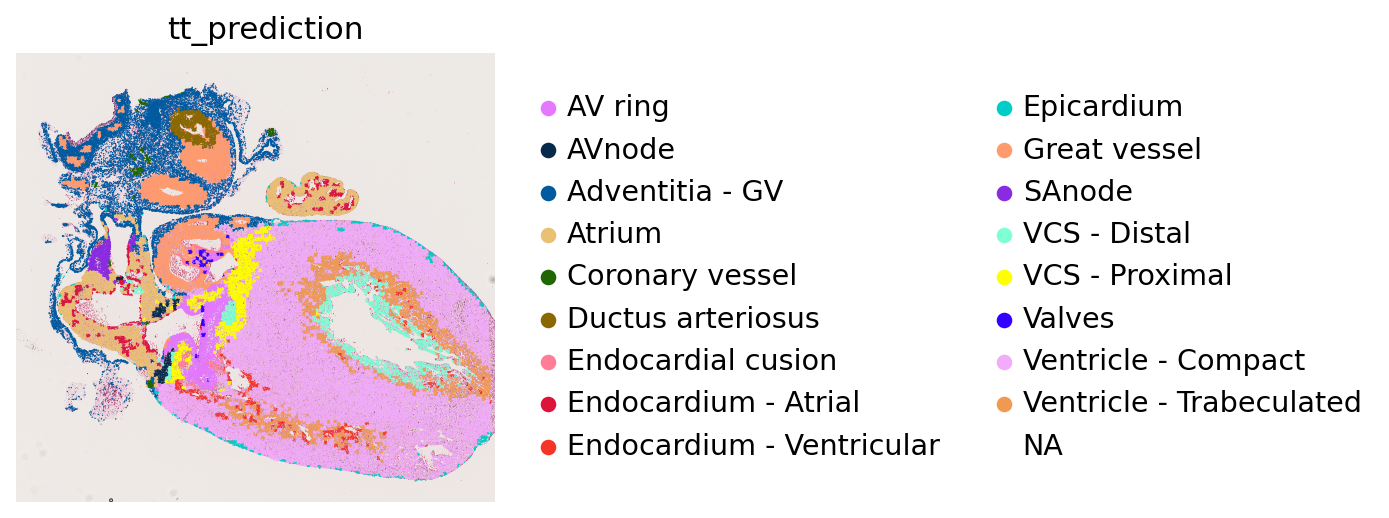

In [12]:
# plot
sc.pl.spatial(adata, 
                  color=[group_col], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=2,palette=AnnotationPalette,
                  frameon=False,show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_TissueTypist_predicted-labels.pdf', bbox_inches="tight",dpi=300)

In [14]:
labels_to_plot = adata.obs[group_col].cat.categories.copy()
print(len(labels_to_plot))
labels_to_plot

17


Index(['AV ring', 'AVnode', 'Adventitia - GV', 'Atrium', 'Coronary vessel',
       'Ductus arteriosus', 'Endocardial cusion', 'Endocardium - Atrial',
       'Endocardium - Ventricular', 'Epicardium', 'Great vessel', 'SAnode',
       'VCS - Distal', 'VCS - Proximal', 'Valves', 'Ventricle - Compact',
       'Ventricle - Trabeculated'],
      dtype='object')

In [ ]:
fig,axs=plt.subplots(nrows=3,ncols=6,figsize=(24,9))
# Flatten the axs array for easier iteration in case of multiple rows and columns
axs_flat = axs.flatten()

for i,label in enumerate(labels_to_plot):
    ad = adata.copy()
    # update colors
    # get color in adata
    ind = list(ad.obs[group_col].cat.categories).index(label)
    ad.uns[f'{group_col}_colors'][ind] = 'greenyellow'
    # plot
    sc.pl.spatial(ad, 
                  color=group_col, groups=label,
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=7,legend_loc=None,
                  frameon=False,title=label,
                  show=False, ax=axs_flat[i],
                 )
# Turn off any remaining subplots
for j in range(len(labels_to_plot), len(axs_flat)):
    fig.delaxes(axs_flat[j])

# fig.suptitle('Main Title for the Figure')
fig.tight_layout()

# Plotting cropped images - predicted labels

### Atrium

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'MATH': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closing glyph list over 'GSUB': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'GSUB': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn

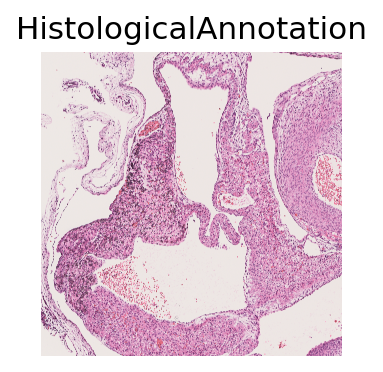

In [16]:
mask = ((adata.obs['array_row'] >= 1500) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 400) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, 
              color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=0,alpha_img=1,legend_loc=None,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Atrium_HE.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 24 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'G', 'H', 'N', 'V', 'a', 'c', 'e', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 42, 43, 49, 57, 68, 70, 72, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88, 89]
Closed glyph list over 'MATH': 24 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'G', 'H', 'N', 'V', 'a', 'c', 'e', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 42, 43, 49, 57, 68, 70, 72, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88, 89]
Closing glyph list over 'GSUB': 24 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'G', 'H', 'N', 'V', 'a', 'c', 'e', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', '

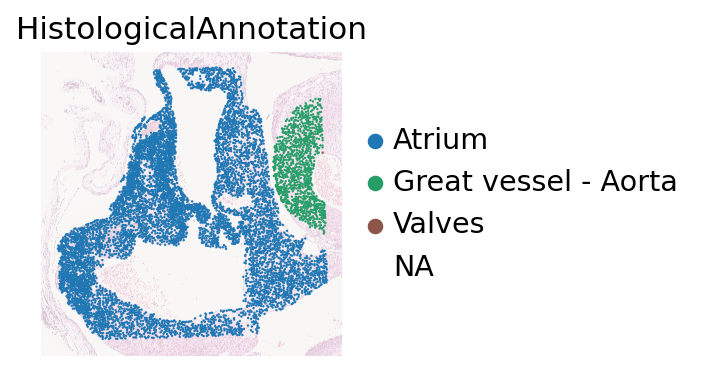

In [17]:
n_annotation = len(bdata.obs['HistologicalAnnotation'].cat.categories)
bdata.uns['HistologicalAnnotation'] = list(np.repeat('#ffff00',n_annotation))

# update colors
for c in bdata.obs['HistologicalAnnotation'].cat.categories:
    # get color in adata
    ind = list(adata.obs['HistologicalAnnotation'].cat.categories).index(c)
    color = adata.uns['HistologicalAnnotation_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs['HistologicalAnnotation'].cat.categories).index(c)
    bdata.uns['HistologicalAnnotation_colors'][ind] = color

sc.pl.spatial(bdata, 
                  color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Atrium_HistologicalAnnotation.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 34 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'G', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v', 'x', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 38, 39, 40, 42, 49, 51, 54, 55, 57, 66, 68, 69, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92]
Closed glyph list over 'MATH': 34 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'G', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v', 'x', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 38, 39, 40, 42, 49, 51, 54, 55, 57, 66, 68, 69, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92]
Closi

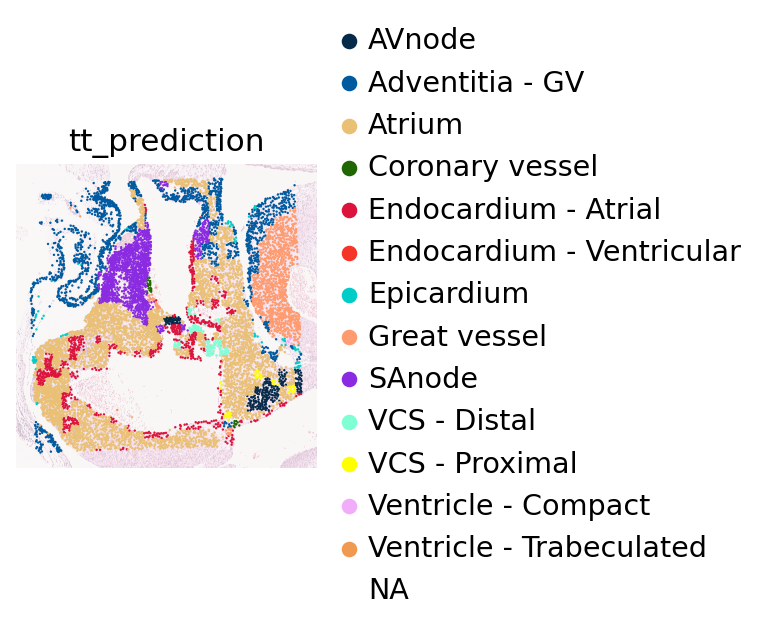

In [18]:
sc.pl.spatial(bdata, 
                  color=[
                      group_col
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,palette=AnnotationPalette,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Atrium_TissueTypist_window_predicted-labels.pdf', bbox_inches="tight",dpi=300)

### Ventricle

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'MATH': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closing glyph list over 'GSUB': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'GSUB': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn

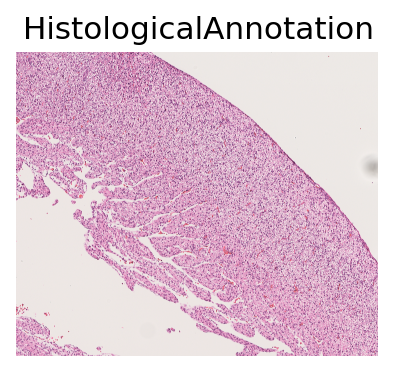

In [19]:
mask = ((adata.obs['array_row'] >= 1300) & 
        (adata.obs['array_row'] <= 2100) & 
        (adata.obs['array_col'] >= 2400) & 
        (adata.obs['array_col'] <= 3400)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, 
              color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=0,alpha_img=1,legend_loc=None,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Ventricle_HE.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'V', 'a', 'c', 'e', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 57, 68, 70, 72, 74, 76, 79, 81, 82, 85, 86, 87]
Closed glyph list over 'MATH': 18 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'V', 'a', 'c', 'e', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 57, 68, 70, 72, 74, 76, 79, 81, 82, 85, 86, 87]
Closing glyph list over 'GSUB': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'V', 'a', 'c', 'e', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 57, 68, 70, 72, 74, 76, 79, 81, 82, 85, 86, 87]
Closed glyph list over 'GSUB': 18 glyphs after
Glyph name

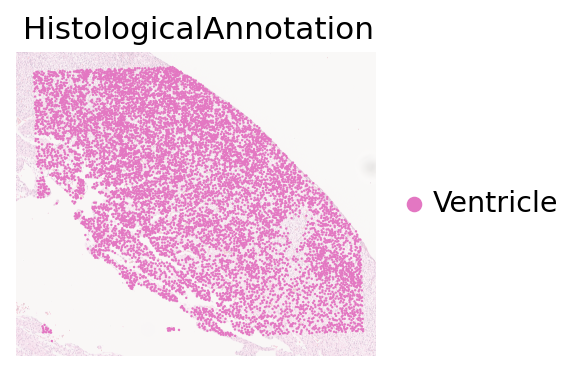

In [20]:
n_annotation = len(bdata.obs['HistologicalAnnotation'].cat.categories)
bdata.uns['HistologicalAnnotation'] = list(np.repeat('#ffff00',n_annotation))

# update colors
for c in bdata.obs['HistologicalAnnotation'].cat.categories:
    # get color in adata
    ind = list(adata.obs['HistologicalAnnotation'].cat.categories).index(c)
    color = adata.uns['HistologicalAnnotation_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs['HistologicalAnnotation'].cat.categories).index(c)
    bdata.uns['HistologicalAnnotation_colors'][ind] = color

sc.pl.spatial(bdata, 
                  color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Ventricle_HistologicalAnnotation.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 27 glyphs before
Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore']
Glyph IDs:   [0, 1, 2, 3, 16, 38, 39, 40, 54, 55, 57, 66, 68, 69, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88]
Closed glyph list over 'MATH': 27 glyphs after
Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore']
Glyph IDs:   [0, 1, 2, 3, 16, 38, 39, 40, 54, 55, 57, 66, 68, 69, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88]
Closing glyph list over 'GSUB': 27 glyphs before
Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'S', 'T', 'V', 'a', 'b', 'c', 'd'

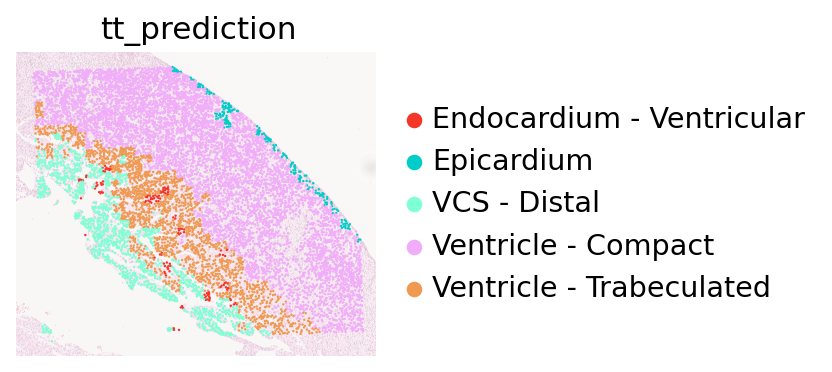

In [21]:
sc.pl.spatial(bdata, 
                  color=[
                      group_col
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,palette=AnnotationPalette,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_Ventricle_TissueTypist_window_predicted-labels.pdf', bbox_inches="tight",dpi=300)

### Great vessel

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'MATH': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closing glyph list over 'GSUB': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 's', 'space', 't']
Glyph IDs:   [0, 1, 2, 3, 36, 43, 68, 70, 74, 76, 79, 81, 82, 86, 87]
Closed glyph list over 'GSUB': 15 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'H', 'a', 'c', 'g', 'i', 'l', 'n', 'nonmarkingreturn

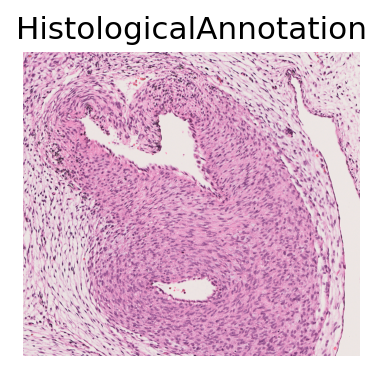

In [22]:
mask = ((adata.obs['array_row'] >= 2600) & 
        (adata.obs['array_row'] <= 3000) & 
        (adata.obs['array_col'] >= 1200) & 
        (adata.obs['array_col'] <= 1650)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, 
              color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=0,alpha_img=1,legend_loc=None,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_GreatVessel_HE.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 29 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'H', 'L', 'N', 'P', 'a', 'c', 'd', 'e', 'f', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't', 'u', 'v', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 39, 42, 43, 47, 49, 51, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88, 89, 92]
Closed glyph list over 'MATH': 29 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'H', 'L', 'N', 'P', 'a', 'c', 'd', 'e', 'f', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'r', 's', 'space', 't', 'u', 'v', 'y']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 39, 42, 43, 47, 49, 51, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88, 89, 92]
Closing glyph list over 'GSUB': 29 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'G', 'H', 'L', 'N', 

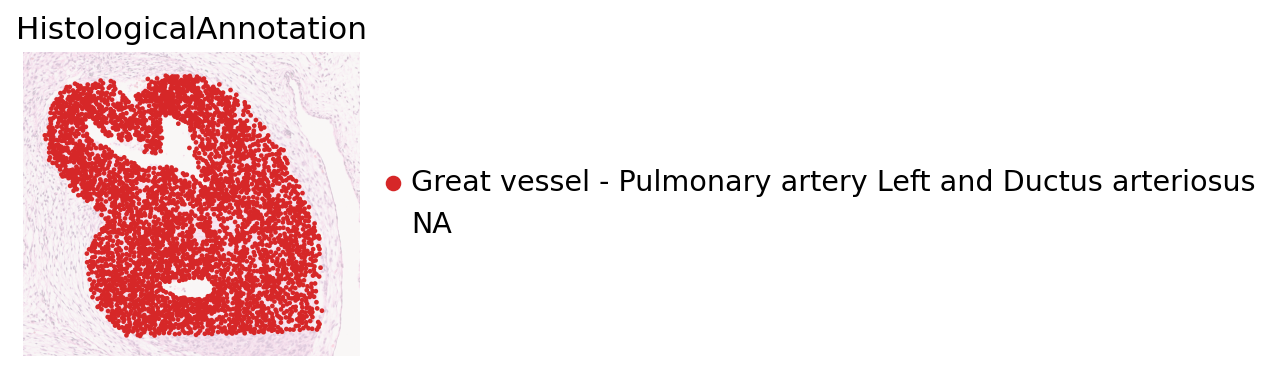

In [23]:
n_annotation = len(bdata.obs['HistologicalAnnotation'].cat.categories)
bdata.uns['HistologicalAnnotation'] = list(np.repeat('#ffff00',n_annotation))

# update colors
for c in bdata.obs['HistologicalAnnotation'].cat.categories:
    # get color in adata
    ind = list(adata.obs['HistologicalAnnotation'].cat.categories).index(c)
    color = adata.uns['HistologicalAnnotation_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs['HistologicalAnnotation'].cat.categories).index(c)
    bdata.uns['HistologicalAnnotation_colors'][ind] = color

sc.pl.spatial(bdata, 
                  color=[
                      'HistologicalAnnotation'
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_GreatVessel_HistologicalAnnotation.pdf', bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 26 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'G', 'V', 'a', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 39, 40, 42, 57, 66, 68, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89]
Closed glyph list over 'MATH': 26 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'G', 'V', 'a', 'c', 'd', 'e', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'underscore', 'v']
Glyph IDs:   [0, 1, 2, 3, 16, 36, 39, 40, 42, 57, 66, 68, 70, 71, 72, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89]
Closing glyph list over 'GSUB': 26 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'G', 'V', 'a', 'c', 'd', 'e', 'hyphen', 'i', 'l', '

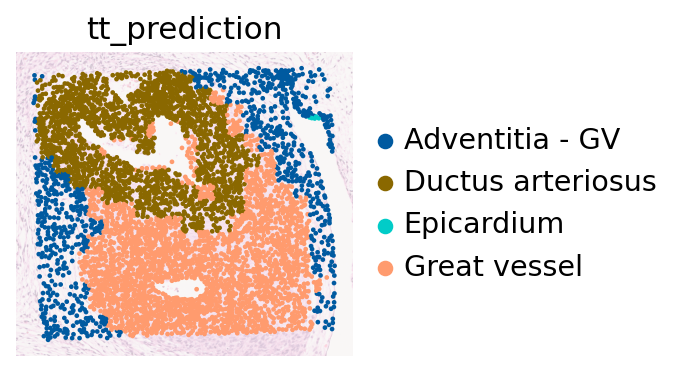

In [24]:
sc.pl.spatial(bdata, 
                  color=[
                      group_col
                        ], 
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,palette=AnnotationPalette,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_GreatVessel_TissueTypist_window_predicted-labels.pdf', bbox_inches="tight",dpi=300)

# Plotting cropped images - cell types

In [12]:
# celltype name mapping for plotting
df = pd.read_csv('/nfs/team205/heart/anndata_objects/Foetal/finegrain_name_mapping.csv')
celltype_mapping = df.set_index('Full_name')['Short_name_finalised'].to_dict()
adata.obs.replace({'fine_grain_4Jan2025':celltype_mapping},inplace=True)

### Atrium

In [13]:
celltype_key = 'fine_grain_4Jan2025'
set(adata.obs[celltype_key])

{'AVNPC',
 'B',
 'ChromC',
 'CorArtEC',
 'CorCapEC',
 'CorPeri',
 'CorSMC',
 'CorVenEC',
 'DASMC',
 'EPDC',
 'EndoCush',
 'Endocard',
 'Eryth',
 'FB',
 'FBCOL2A1',
 'GVArtEC',
 'GVSMC',
 'GVSMCP',
 'GVSMCT',
 'GVVenEC',
 'ILC',
 'LymphEC',
 'MPLYVE1',
 'MacCX3',
 'MegaK',
 'MesEpiC',
 'MoDC',
 'Mono',
 'NeuroPre',
 'ParaN',
 'PericFib',
 'PericInt',
 'SANPCHd',
 'SANPCHn',
 'SANPCT',
 'SchwC',
 'SchwNeuro',
 'SchwP',
 'SympN',
 'VCSDist',
 'VCSProx',
 'ValveEC',
 'ValveIC',
 'aCML',
 'aCMR',
 'vCMC',
 'vCMT'}

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 17 glyphs before
Glyph names: ['.notdef', '.null', 'J', 'a', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'r', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 45, 66, 68, 72, 73, 74, 76, 81, 85]
Closed glyph list over 'MATH': 17 glyphs after
Glyph names: ['.notdef', '.null', 'J', 'a', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'r', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 45, 66, 68, 72, 73, 74, 76, 81, 85]
Closing glyph list over 'GSUB': 17 glyphs before
Glyph names: ['.notdef', '.null', 'J', 'a', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'r', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 45, 66, 68, 72, 73, 74, 76, 81, 85]
Closed glyph list over '

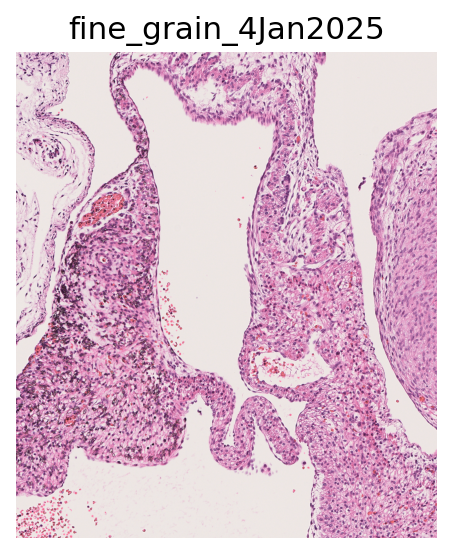

In [15]:
# HE
mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1100)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, 
              color=['fine_grain_4Jan2025'],
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=0,alpha_img=1,
                  legend_loc=None, frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_SAN_for-Fig1_HE.pdf',bbox_inches="tight",dpi=300)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 32 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'J', 'M', 'N', 'P', 'R', 'S', 'V', 'a', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 36, 37, 38, 40, 41, 42, 45, 48, 49, 51, 53, 54, 57, 66, 68, 72, 73, 74, 76, 81, 82, 83, 85, 86]
Closed glyph list over 'MATH': 32 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'J', 'M', 'N', 'P', 'R', 'S', 'V', 'a', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 23, 24, 36, 37, 38, 40, 41, 42, 45, 48, 49, 51, 53, 54, 57, 66, 68, 72, 73, 74, 76, 81, 82, 83, 85, 86]
Closing glyph list over 'GSUB

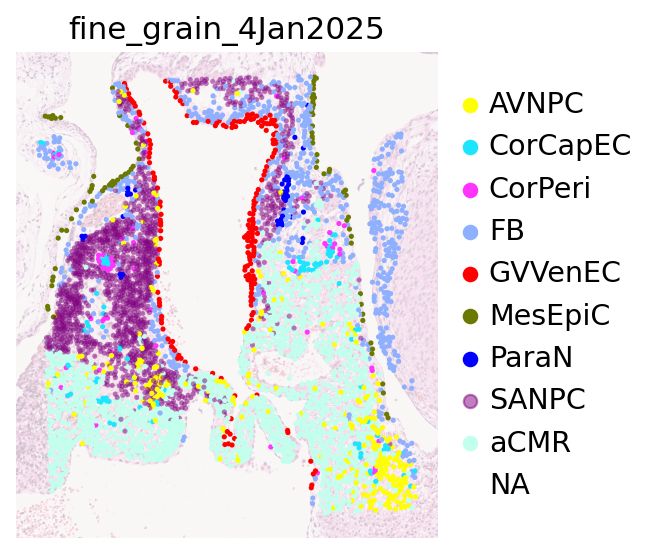

In [27]:
mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1100)
       )
bdata = adata[mask]

bdata.obs[celltype_key] = bdata.obs[celltype_key].astype('str')
bdata.obs.replace({celltype_key:{
    'SANPCHn':'SANPC',
    'SANPCHd':'SANPC',
    'SANPCT':'SANPC'
}},inplace=True)
bdata.obs[celltype_key] = bdata.obs[celltype_key].astype('category')

celltypes_to_plot = ['SANPC',
                     'CorCapEC',
                     'CorPeri',
                     'GVVenEC',
                     'MesEpiC',
                     'FB',
                     'aCMR',
                     'AVNPC',
                     'ParaN',
                     'SchwP',
                    ]

# modify colors
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('GVVenEC')]='red'
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('ParaN')]='blue'
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('SANPC')]=(0.5, 0.0, 0.5, 0.50) # purple, 30% opacity

sc.pl.spatial(bdata, 
              color=['fine_grain_4Jan2025'], groups=celltypes_to_plot,
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=1.5,alpha_img=0.3,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_SAN_for-Fig1.pdf',bbox_inches="tight",dpi=300)

In [31]:
print(bdata.obs[celltype_key].cat.categories)
bdata.uns[f"{celltype_key}_colors"]

Index(['AVNPC', 'CorCapEC', 'CorPeri', 'DASMC', 'EPDC', 'EndoCush', 'Endocard',
       'Eryth', 'FB', 'GVSMC', 'GVSMCT', 'GVVenEC', 'LymphEC', 'MPLYVE1',
       'MacCX3', 'MesEpiC', 'MoDC', 'ParaN', 'PericFib', 'SANPC', 'SchwC',
       'SchwNeuro', 'ValveEC', 'ValveIC', 'aCML', 'aCMR'],
      dtype='object')


['#ffff00',
 '#1ce6ff',
 '#ff34ff',
 '#a30059',
 '#ffdbe5',
 '#63ffac',
 '#b79762',
 '#004d43',
 '#8fb0ff',
 '#997d87',
 '#5a0007',
 'red',
 '#4a3b53',
 '#ff2f80',
 '#ba0900',
 '#6b7900',
 '#00c2a0',
 'blue',
 '#b903aa',
 (0.5, 0.0, 0.5, 0.5),
 '#7b4f4b',
 '#013349',
 '#00846f',
 '#372101',
 '#ffb500',
 '#c2ffed',
 '#cc0744',
 '#c0b9b2']

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 26 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'J', 'M', 'N', 'P', 'S', 'X', 'a', 'c', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'r', 'space', 'three', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 22, 23, 24, 36, 38, 45, 48, 49, 51, 54, 59, 66, 68, 70, 72, 73, 74, 76, 81, 85]
Closed glyph list over 'MATH': 26 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'J', 'M', 'N', 'P', 'S', 'X', 'a', 'c', 'e', 'f', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'r', 'space', 'three', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 19, 21, 22, 23, 24, 36, 38, 45, 48, 49, 51, 54, 59, 66, 68, 70, 72, 73, 74, 76, 81, 85]
Closing glyph list over 'GSUB': 26 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'J', 'M', 'N', 'P', 'S', 'X', 'a', '

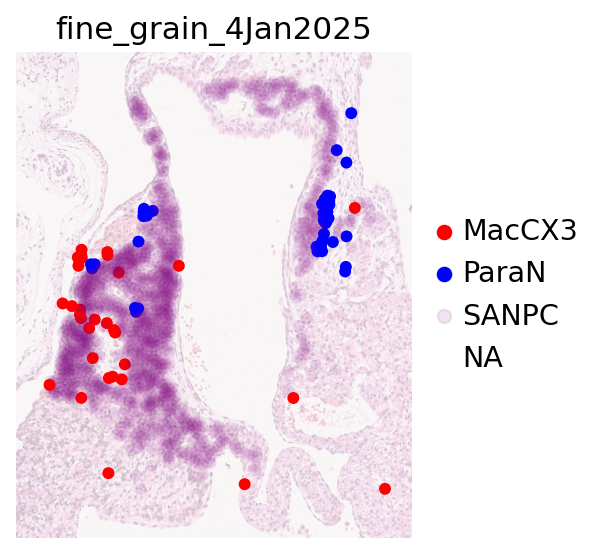

In [39]:
celltypes_plot = {
    'SANPC':"#8000801A", # purple, 15% opacity
    'ParaN':'blue',
    'MacCX3':'red'
}

for celltype,color in celltypes_plot.items():
    # update colors
    bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index(celltype)]=color

sc.pl.spatial(bdata, 
              color=[celltype_key], 
              groups=list(celltypes_plot.keys()),
                  img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
                  size=3,alpha_img=0.3,
                  frameon=False, show=False
                 )
plt.savefig(f'{figdir}/VisiumHD_euploid_SAN_{"-".join(list(celltypes_plot.keys()))}.pdf',bbox_inches="tight",dpi=300)

# UMAP

<Figure size 448x160 with 0 Axes>

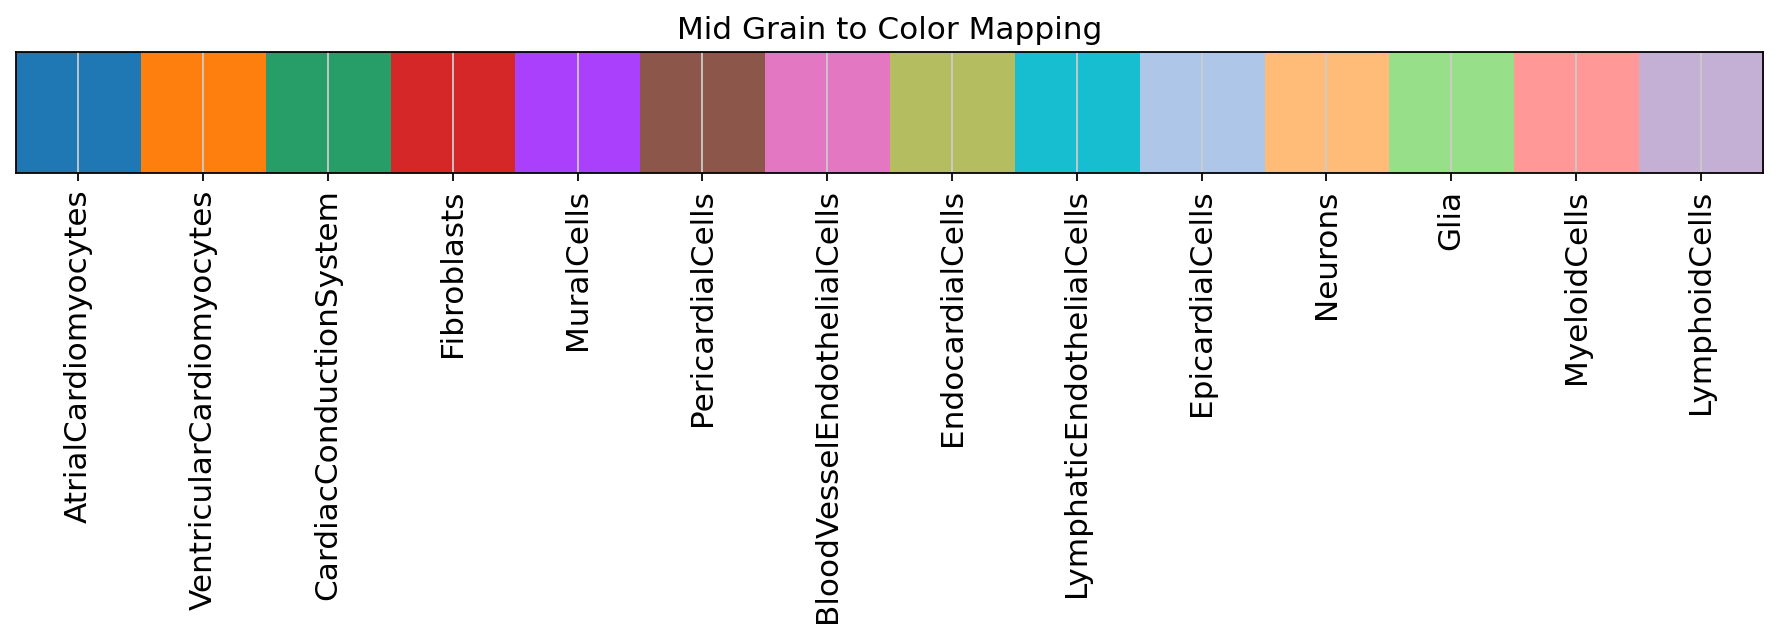

In [18]:
ADATA_PATH = "/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw_finegrain_updated.h5ad"
ad = sc.read_h5ad(ADATA_PATH, backed='r')

# Step 1: Create mapping (already done)
cat = "mid_grain"
mid2colours = dict(zip(ad.obs[cat].cat.categories, ad.uns[f"{cat}_colors"]))

# Step 2: Extract the labels and colors in the correct order
mid_grains = list(mid2colours.keys())
palette = list(mid2colours.values())
num_mid_grains = len(mid_grains)

# Step 3: Plot
plt.figure(figsize=(num_mid_grains * 0.4, 2))  # wide figure
sns.palplot(palette)
plt.xticks(np.arange(num_mid_grains), mid_grains, rotation=90)
plt.title("Mid Grain to Color Mapping")
plt.tight_layout()
plt.show()

In [19]:
adata.obs['celltypist_mid_fin'] = pd.Categorical(
    adata.obs['celltypist_mid_fin'],
    categories=ad.obs[cat].cat.categories,
    ordered=True
)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 38 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'L', 'M', 'N', 'P', 'S', 'V', 'X', 'a', 'b', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'two', 'u', 'underscore', 'y']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 37, 38, 40, 41, 42, 47, 48, 49, 51, 54, 57, 59, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 38 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'G', 'L', 'M', 'N', 'P', 'S', 'V', 'X', 'a', 'b', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'two', 'u', 'underscore', 'y']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 37, 38, 40, 41, 42, 47, 48, 49, 51, 54, 57, 59, 66, 68, 69,

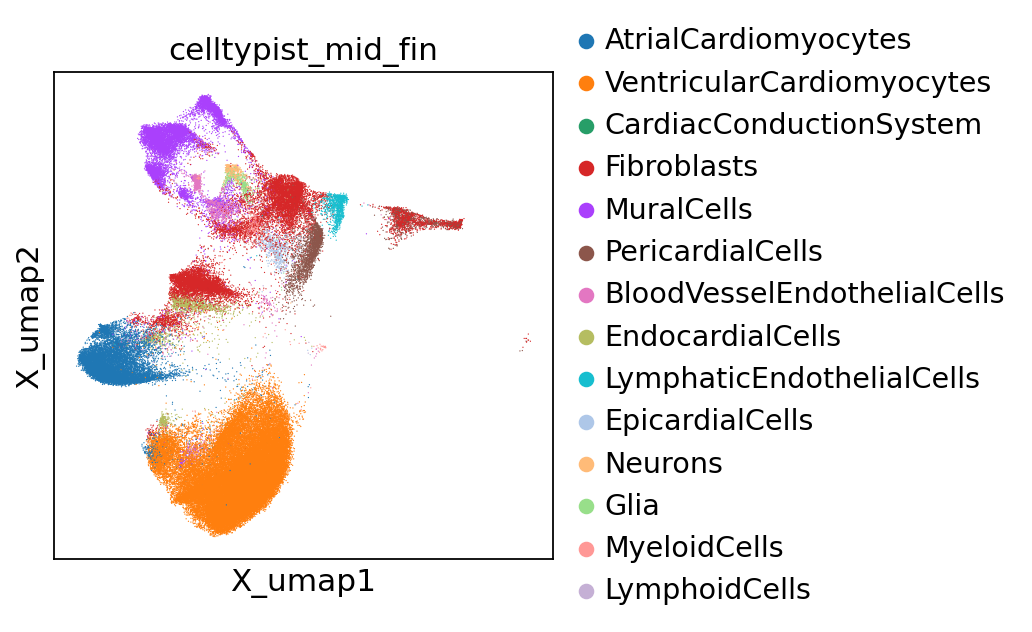

In [21]:
sc.pl.embedding(adata,
                    basis=f"X_umap",
                    color='celltypist_mid_fin',palette=palette,
                show=False
                   )
plt.savefig(f'{figdir}/VisiumHD_UMAP-midgrain_for-Fig1.pdf',bbox_inches="tight",dpi=300)